#### Nama   : Yusuf Ginanjar
#### NIM    : 1227050136
##### Tugas Praktikum Pembelajaran mesin Pertemuan 6

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [46]:
# Membaca dataset dari file CSV
df = pd.read_csv("Electric_Vehicle.csv")

# Menampilkan statistik deskriptif dari dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,5000.0,9.818710e+04,2.367255e+02,9.800100e+04,9.803300e+04,9.810300e+04,9.819800e+04,9.936200e+04
Model Year,5000.0,2.021266e+03,3.079356e+00,2.000000e+03,2.019000e+03,2.022000e+03,2.023000e+03,2.025000e+03
Electric Range,4998.0,5.111004e+01,8.724092e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,3.370000e+02
Base MSRP,4998.0,7.801911e+02,6.731826e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.895000e+04
Legislative District,5000.0,3.361300e+01,1.450015e+01,1.000000e+00,2.200000e+01,4.100000e+01,4.500000e+01,4.900000e+01
DOL Vehicle ID,5000.0,2.337079e+08,7.298469e+07,4.195130e+05,1.983041e+08,2.498819e+08,2.694232e+08,4.787921e+08
2020 Census Tract,5000.0,5.303434e+10,1.300755e+07,5.300796e+10,5.303301e+10,5.303302e+10,5.303303e+10,5.307794e+10


In [47]:
df.head(10)
print(df)

      VIN (1-10)    County       City State  Postal Code  Model Year  \
0     5YJ3E1EBXK      King    Seattle    WA      98178.0        2019   
1     5YJYGDEE3L    Kitsap    Poulsbo    WA      98370.0        2020   
2     KM8KRDAF5P    Kitsap     Olalla    WA      98359.0        2023   
3     5UXTA6C0XM    Kitsap    Seabeck    WA      98380.0        2021   
4     JTMAB3FV7P  Thurston    Rainier    WA      98576.0        2023   
...          ...       ...        ...   ...          ...         ...   
4995  3FMTK4SX1R      King    Seattle    WA      98146.0        2024   
4996  1G1FZ6S07L      King    Seattle    WA      98112.0        2020   
4997  3GNKDBRJXR      King    Seattle    WA      98125.0        2024   
4998  7SAYGDEE2P     Clark  Washougal    WA      98671.0        2023   
4999  W1N0G5DB3L      King    Seattle    WA      98115.0        2020   

               Make           Model                   Electric Vehicle Type  \
0             TESLA         MODEL 3          Battery Ele

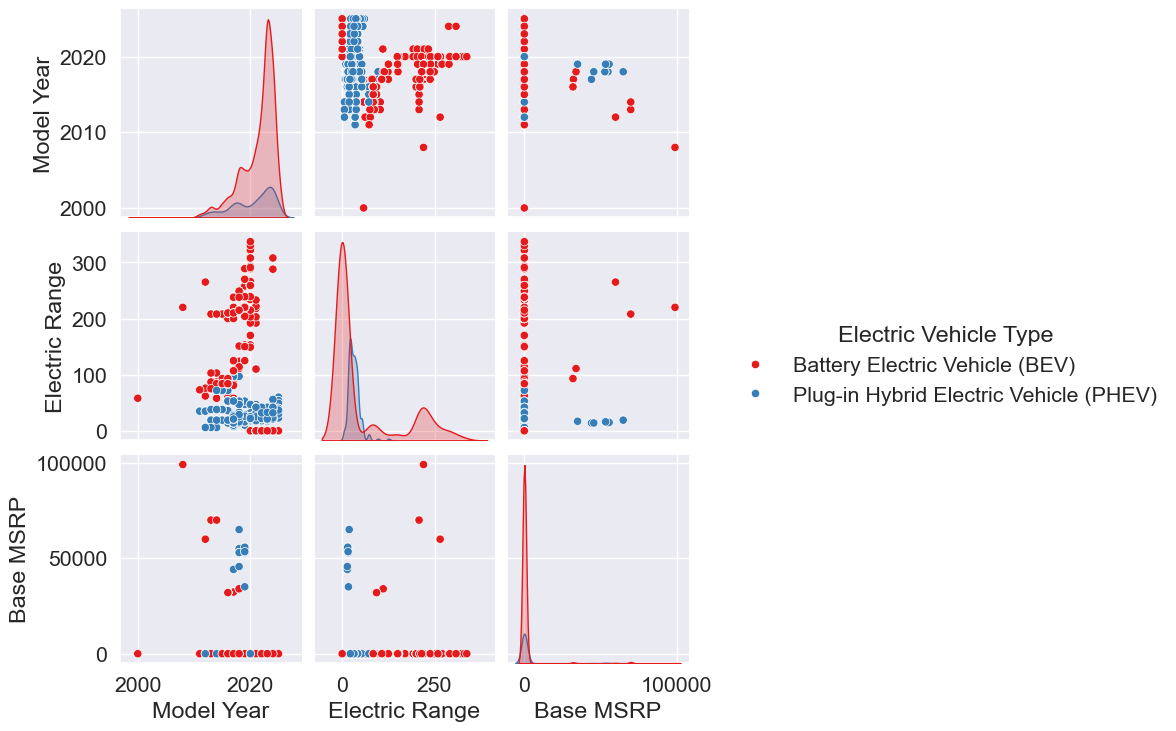

In [48]:
# Pilih subset kolom numerik dan kolom kategori
subset = df[['Model Year', 'Electric Range', 'Base MSRP', 'Electric Vehicle Type']]

# Hapus baris yang mengandung NaN (jika ada)
subset = subset.dropna()

# Plot pairplot
sns.pairplot(subset, hue='Electric Vehicle Type', palette='Set1')
plt.show()

In [49]:
# Pilih fitur (X) dan target (y)
X = df[['Model Year', 'Electric Range', 'Base MSRP']]
y = df['Electric Vehicle Type']

# Hapus baris dengan nilai kosong (NaN)
X = X.dropna()
y = y[X.index]  # Sesuaikan indeks y dengan X yang sudah dibersihkan

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

# Cek jumlah data training dan testing
len(X_train)
len(X_test)

1500

In [50]:
model = DecisionTreeClassifier(criterion='entropy')  # alternative is 'gini' which is a different way to measure information gain
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(X_test)


      Model Year  Electric Range  Base MSRP
2618        2021             0.0        0.0
3205        2022            32.0        0.0
1562        2025             0.0        0.0
549         2022            32.0        0.0
1409        2023             0.0        0.0
...          ...             ...        ...
2570        2022             0.0        0.0
3594        2024             0.0        0.0
3630        2022             0.0        0.0
3651        2022             0.0        0.0
4744        2017            14.0        0.0

[1500 rows x 3 columns]


In [51]:
print(classification_report(y_test, y_pred))

                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       1.00      1.00      1.00      1209
Plug-in Hybrid Electric Vehicle (PHEV)       1.00      1.00      1.00       291

                              accuracy                           1.00      1500
                             macro avg       1.00      1.00      1.00      1500
                          weighted avg       1.00      1.00      1.00      1500



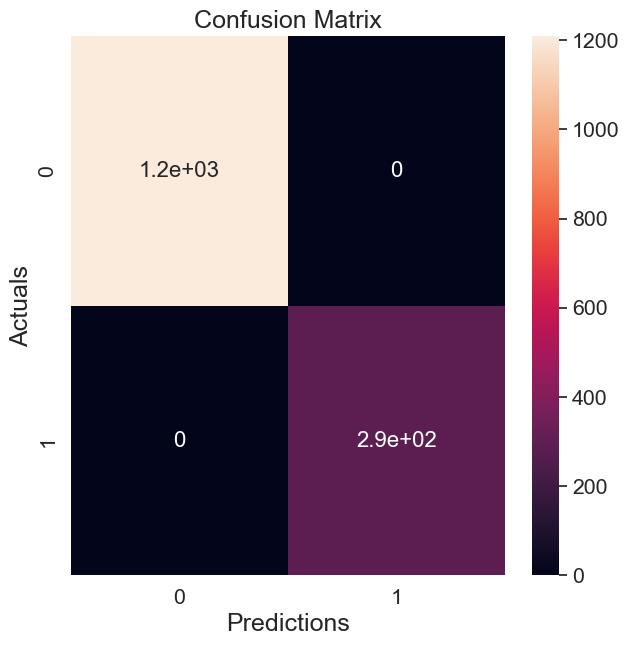

In [52]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, ax=ax,annot=True, annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [53]:
features = ['Model Year', 'Electric Range', 'Base MSRP']

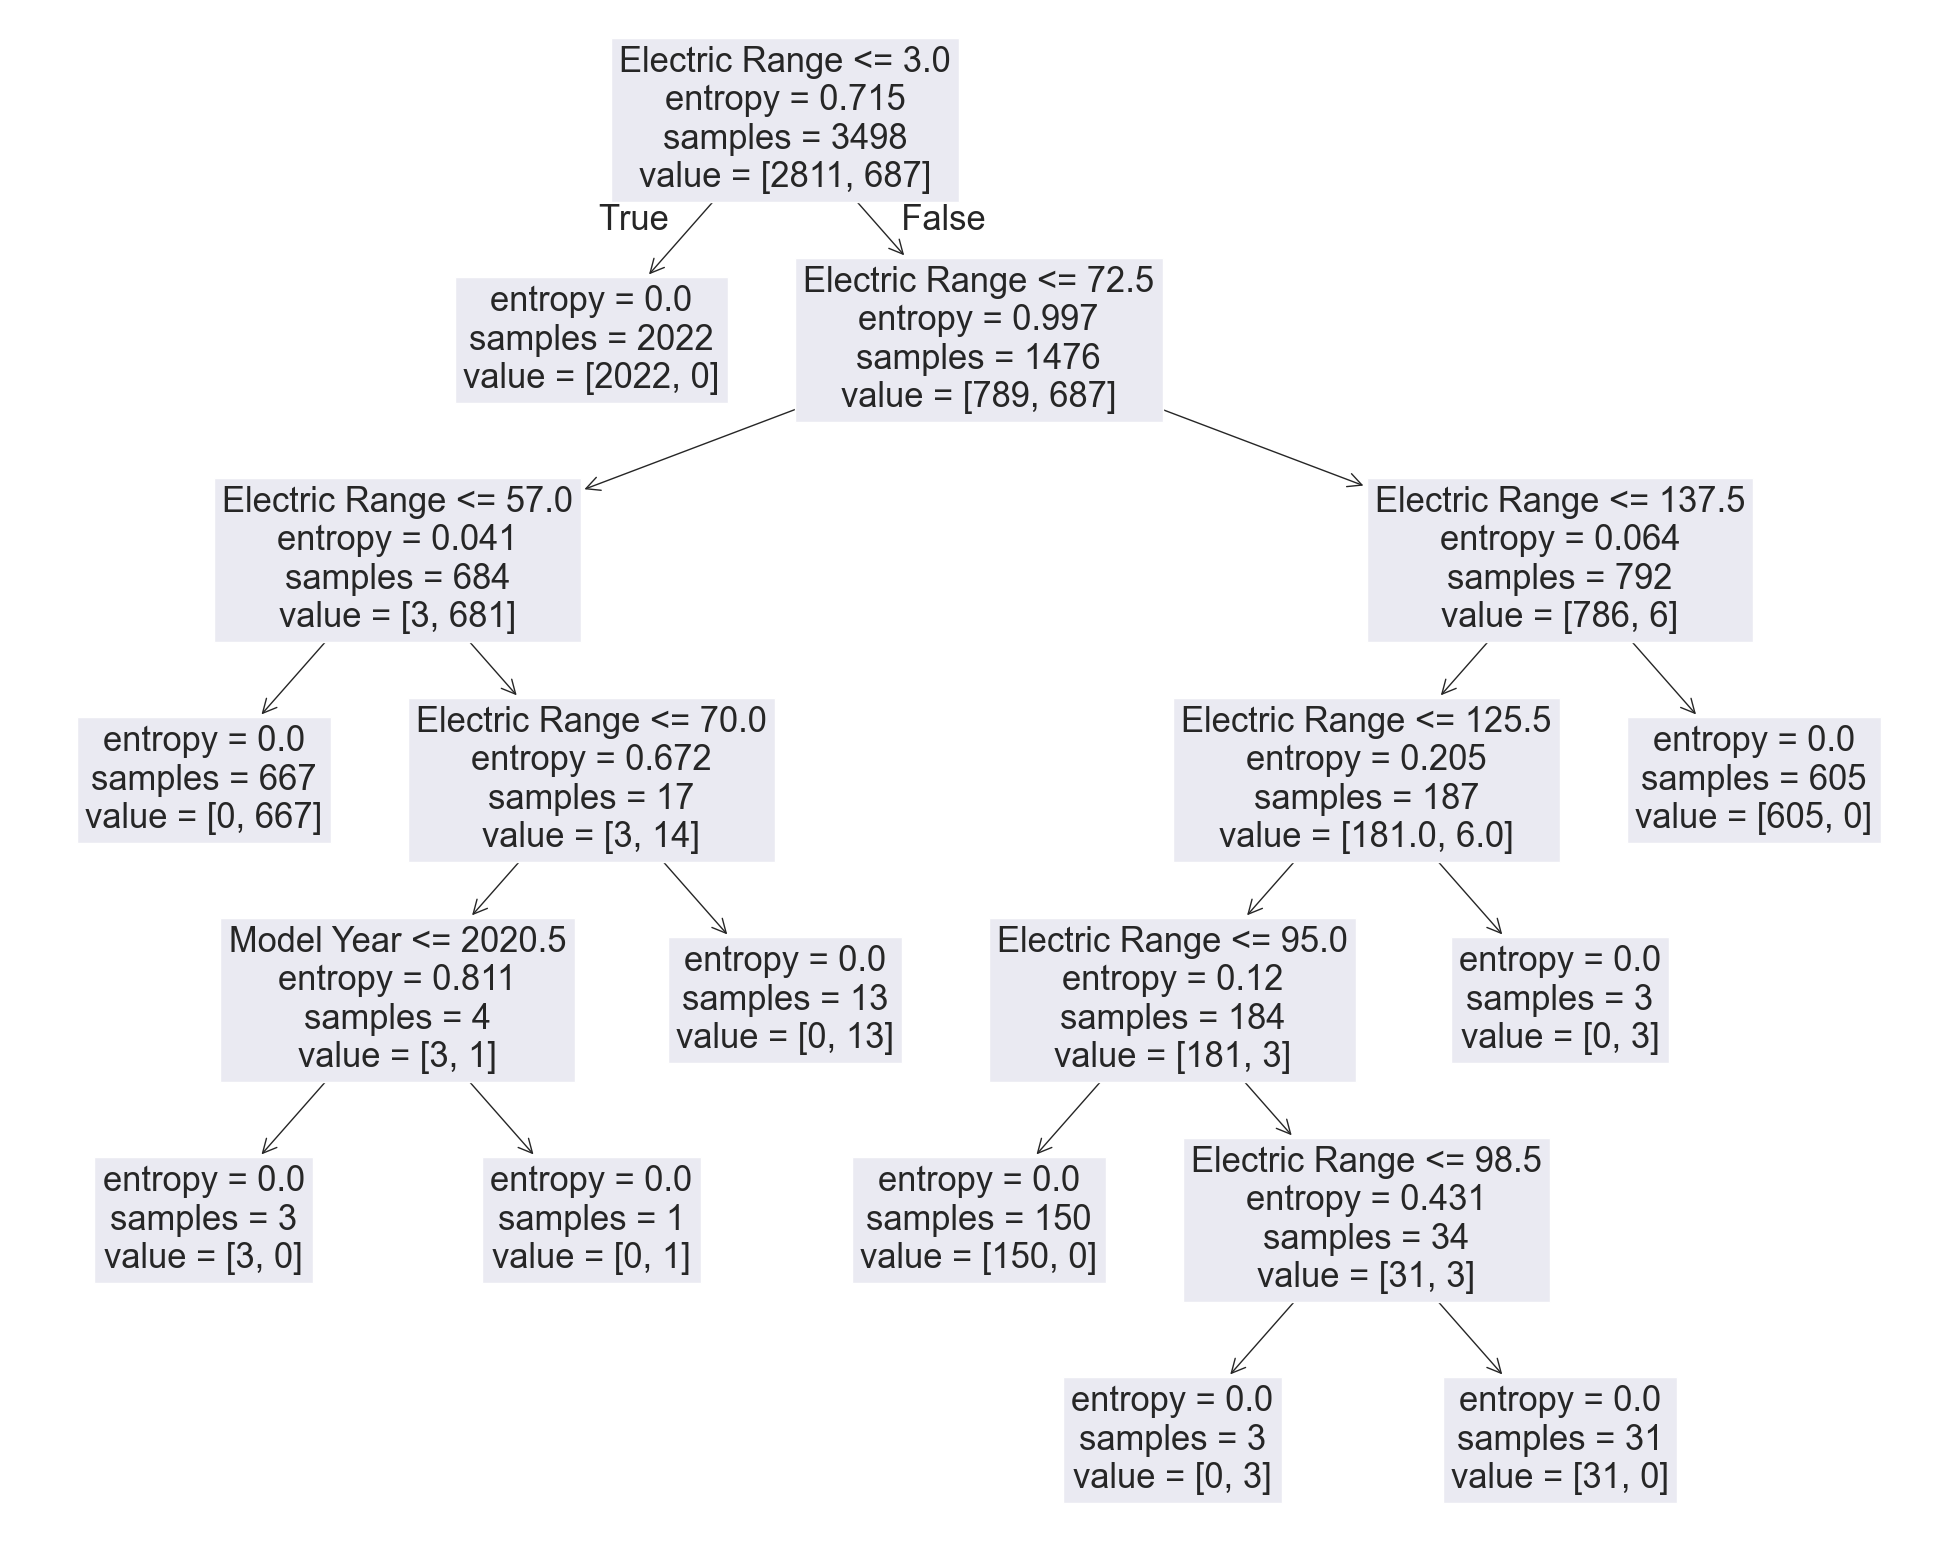

In [54]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(model, feature_names=features)
plt.show()


In [55]:
# Data baru yang ingin diuji
new_vehicle_data = {
    'Model Year': 2022,
    'Electric Range': 300,
    'Base MSRP': 45000
}

In [58]:
# Ensure the order of features matches the training data
feature_order = ['Model Year', 'Electric Range', 'Base MSRP']
prediction_input_df = pd.DataFrame([new_vehicle_data])
prediction = model.predict(prediction_input_df[feature_order]) # Ensure correct column order
print("Jenis kendaraan listrik yang diprediksi:", prediction[0])



Jenis kendaraan listrik yang diprediksi: Battery Electric Vehicle (BEV)


In [57]:
multiple_new_data = [
    {'Model Year': 2020, 'Electric Range': 250, 'Base MSRP': 39000},
    {'Model Year': 2024, 'Electric Range': 0,   'Base MSRP': 0}
]

df_new = pd.DataFrame(multiple_new_data)
predictions = model.predict(df_new[feature_order])
print(predictions)


['Battery Electric Vehicle (BEV)' 'Battery Electric Vehicle (BEV)']
